<a href="https://colab.research.google.com/github/danijel3/CovidPLdata/blob/main/Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [5]:
!wget https://github.com/danijel3/CovidPLdata/raw/main/zgony.csv

--2021-12-11 07:48:57--  https://github.com/danijel3/CovidPLdata/raw/main/zgony.csv
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/danijel3/CovidPLdata/main/zgony.csv [following]
--2021-12-11 07:48:58--  https://raw.githubusercontent.com/danijel3/CovidPLdata/main/zgony.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2819493 (2.7M) [text/plain]
Saving to: ‘zgony.csv’

zgony.csv           100%[===================>]   2.69M  --.-KB/s    in 0.05s   

2021-12-11 07:48:58 (57.0 MB/s) - ‘zgony.csv’ saved [2819493/2819493]



In [50]:
dtypes = {'Data':'str','Płeć':'str','czy_wspolistniejace':'str','w_pelni_zaszczepiony':'str','obnizona_odpornosc':'str','Województwo':'str','Powiat':'str','Wiek2':'Int64','Liczba zgonów':'Int64'}
df=pd.read_csv('zgony.csv',delimiter=';',dtype=dtypes,na_values='brak danych',parse_dates=['Data'])
df['czy_wspolistniejace']=df['czy_wspolistniejace'].map(lambda x:x=='T')
df['w_pelni_zaszczepiony']=df['w_pelni_zaszczepiony'].map(lambda x:x=='T')
df['obnizona_odpornosc']=df['obnizona_odpornosc'].map(lambda x:x=='T')
df

,Data,Płeć,czy_wspolistniejace,w_pelni_zaszczepiony,obnizona_odpornosc,Województwo,Powiat,Wiek2,Liczba zgonów
0,2021-07-12,M,False,False,False,zachodniopomorskie,m. Szczecin,64,1
1,2021-07-12,K,True,False,False,małopolskie,nowotarski,91,1
2,2021-07-12,M,False,False,False,małopolskie,nowosądecki,83,1
3,2021-07-12,K,False,False,False,małopolskie,myślenicki,63,1
4,2021-07-12,K,False,False,False,małopolskie,miechowski,69,1
...,...,...,...,...,...,...,...,...,...
56597,2021-02-01,K,False,False,False,warmińsko-mazurskie,piski,60,1
56598,2021-02-01,K,True,False,False,wielkopolskie,gnieźnieński,95,1
56599,2021-02-01,M,True,False,False,wielkopolskie,gnieźnieński,70,1
56600,2021-02-01,M,False,False,False,śląskie,m. Katowice,69,1


In [53]:
df.describe()

,Wiek2,Liczba zgonów
count,56538.000000,56602.000000
mean,75.104567,1.020035
std,12.206206,0.147611
min,0.000000,1.000000
25%,68.000000,1.000000
50%,76.000000,1.000000
75%,84.000000,1.000000
max,100.000000,4.000000


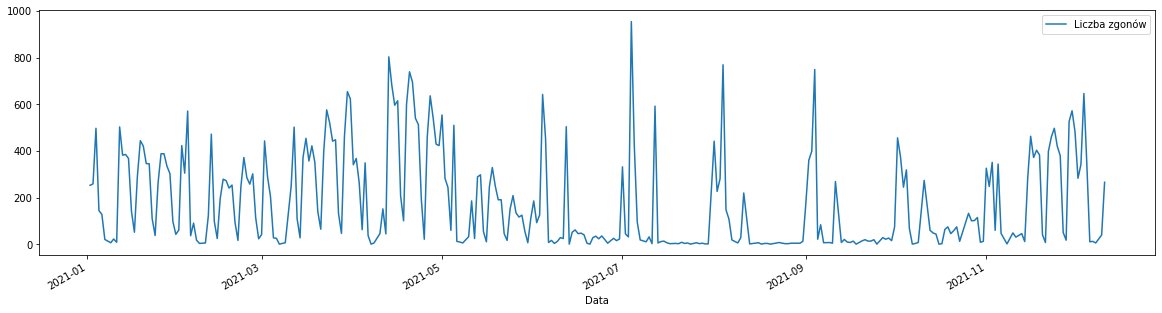

In [44]:
df.groupby('Data').agg({'Liczba zgonów':'sum'}).plot(figsize=(20,5))

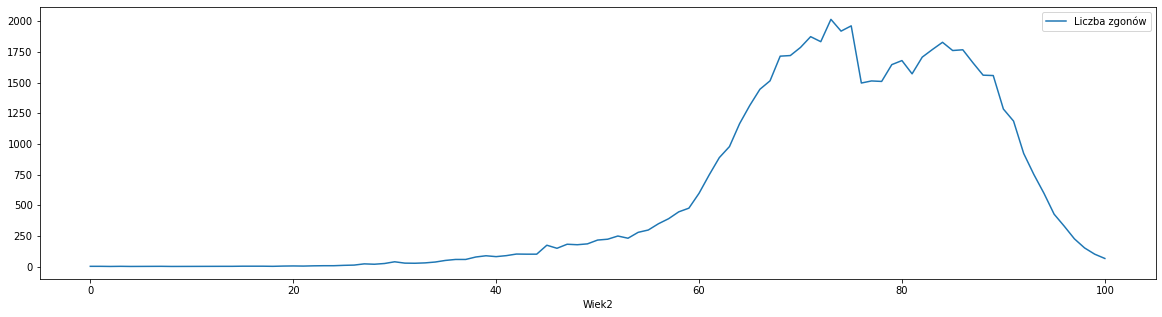

In [45]:
df.groupby(['Wiek2']).agg({'Liczba zgonów':'sum'}).plot(figsize=(20,5))

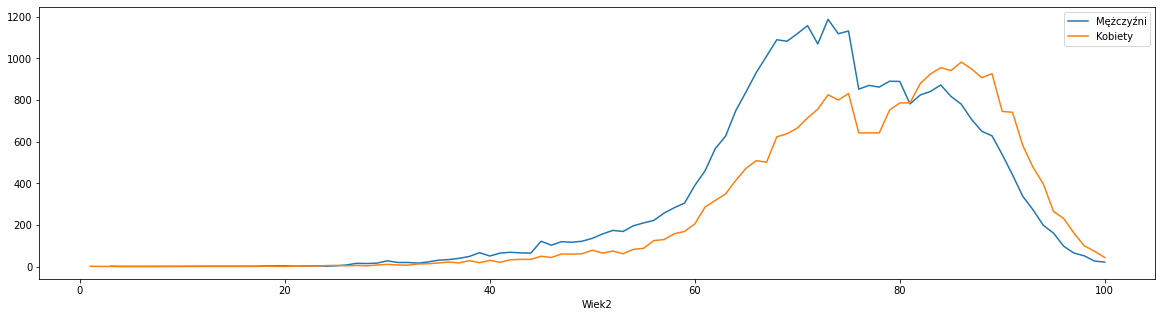

In [46]:
ax=df[df['Płeć']=='M'].groupby(['Wiek2']).agg({'Liczba zgonów':'sum'}).set_axis(['Mężczyźni'],axis=1).plot(figsize=(20,5))
df[df['Płeć']=='K'].groupby(['Wiek2']).agg({'Liczba zgonów':'sum'}).set_axis(['Kobiety'],axis=1).plot(ax=ax)

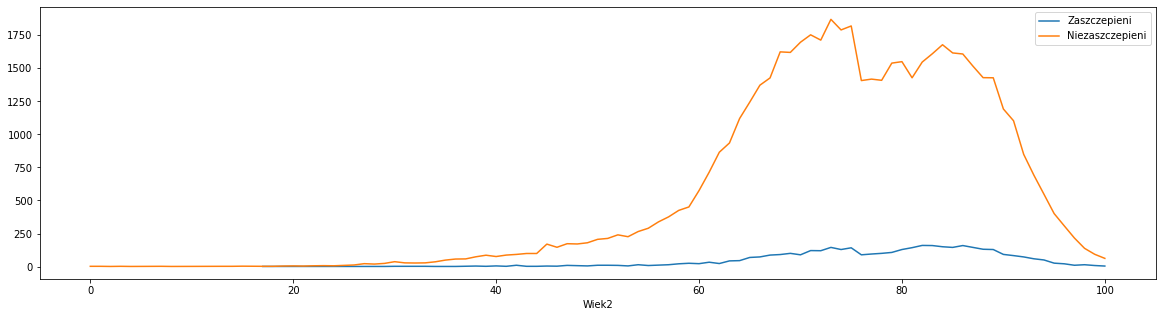

In [52]:
ax=df[df['w_pelni_zaszczepiony']].groupby(['Wiek2']).agg({'Liczba zgonów':'sum'}).set_axis(['Zaszczepieni'],axis=1).plot(figsize=(20,5))
df[df['w_pelni_zaszczepiony']!=True].groupby(['Wiek2']).agg({'Liczba zgonów':'sum'}).set_axis(['Niezaszczepieni'],axis=1).plot(ax=ax)